# Healthcare Lab (Explotarory Data Analysis)

**Learning Objectives:**
  * Practice Basic Exploratory Data Analysis
  
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [4]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [5]:
HealthCareDataSet['AgeAtMedicalEvent']=(HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate'])

In [6]:
HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

0        52.657084
1        52.657084
2        52.657084
3        52.657084
4        52.657084
           ...    
52558    80.637919
52559    70.258727
52560    70.258727
52561    70.258727
52562    70.258727
Name: AgeAtMedicalEvent, Length: 52563, dtype: float64

In [7]:
HealthCareDataSet['AgeAtMedicalEvent']=HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

In [8]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

### 3. Hospital's cost analysis
#### Let's perform some basic exploration of costs accross hospitals
#### For clarity purposes we will work only with the top 20 hospitals in terms of TotalExpenses

In [9]:
HealthCareDataSet[['MedicalClaim','ClaimItem','HospitalName','HospitalType','TypeFlag','TotalExpenses']]

,MedicalClaim,ClaimItem,HospitalName,HospitalType,TypeFlag,TotalExpenses
0,c1e3436737c77899,18,04b77561,HOSPITAL,ER,15.148
1,c1e3436737c77899,21,04b77561,HOSPITAL,ER,3.073
2,c1e3436737c77899,10,04b77561,HOSPITAL,ER,123.900
3,c1e3436737c77899,20,04b77561,HOSPITAL,ER,7.511
4,c1e3436737c77899,19,04b77561,HOSPITAL,ER,8.631
...,...,...,...,...,...,...
52558,90e8ae169cbba3bd,1,a9bf1474,HOSPITAL,INP,2436.000
52559,8b6a8d2720d16e97,7,a9bf1474,HOSPITAL,INP,2075.500
52560,8b6a8d2720d16e97,8,a9bf1474,HOSPITAL,INP,865.900
52561,8b6a8d2720d16e97,12,a9bf1474,HOSPITAL,INP,665.000


In [10]:
HealthCareDataSet.groupby('HospitalName')['TotalExpenses'].sum().sort_values(ascending=False).head(20)

HospitalName
ae46acbf    3.560780e+07
446442f4    2.151007e+07
a9bf1474    1.230149e+07
4d103af0    1.000380e+07
2f45157f    8.243037e+06
295f5b41    5.059537e+06
6407c38a    4.732623e+06
e07b4c04    3.855674e+06
ae2f2d9e    3.347561e+06
2148dc02    3.171828e+06
04b77561    2.493767e+06
cf2a3695    2.226622e+06
35da0521    2.193533e+06
46658edc    2.036948e+06
db3c8b2f    1.868650e+06
52da077a    1.696322e+06
b592f5ae    1.558968e+06
b24ec550    1.540801e+06
22781f18    1.488500e+06
b83ddf4f    1.176243e+06
Name: TotalExpenses, dtype: float64

In [11]:
Top20HospitalsList=HealthCareDataSet.groupby('HospitalName')['TotalExpenses'].sum().sort_values(ascending=False).head(20).index
Top20HospitalsList

Index(['ae46acbf', '446442f4', 'a9bf1474', '4d103af0', '2f45157f', '295f5b41',
       '6407c38a', 'e07b4c04', 'ae2f2d9e', '2148dc02', '04b77561', 'cf2a3695',
       '35da0521', '46658edc', 'db3c8b2f', '52da077a', 'b592f5ae', 'b24ec550',
       '22781f18', 'b83ddf4f'],
      dtype='object', name='HospitalName')

In [12]:
Top20HospitalFilter=HealthCareDataSet['HospitalName'].isin(Top20HospitalsList)

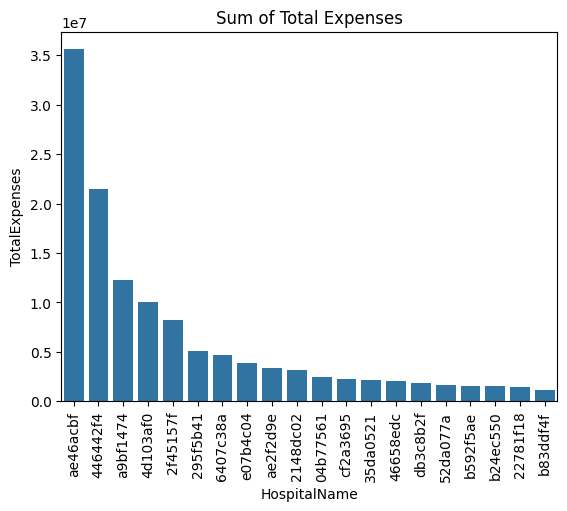

In [13]:
g=sns.barplot(data=HealthCareDataSet[Top20HospitalFilter].groupby('HospitalName')['TotalExpenses'].sum().sort_values(ascending=False))
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title('Sum of Total Expenses');

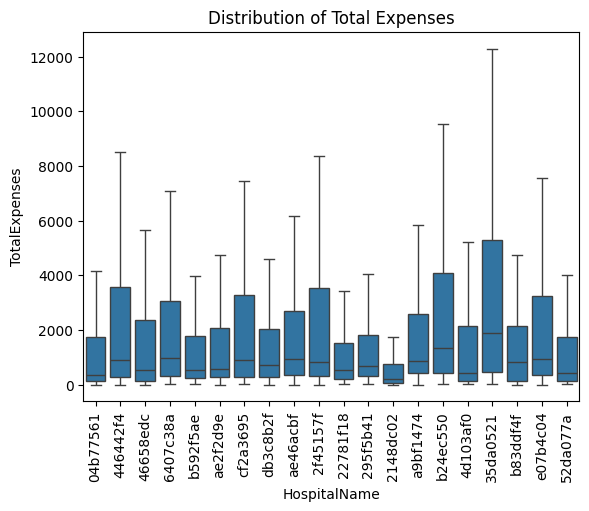

In [14]:
g=sns.boxplot(data=HealthCareDataSet[Top20HospitalFilter], x="HospitalName", y="TotalExpenses",showfliers=False)
g.set_title('Distribution of Total Expenses');
g.set_xticklabels(g.get_xticklabels(), rotation=90);


#### From the previous figures we observe that: (1) the hospital named `ae46acbf` has the largest sum of Total Expenses, (2) the hospital named `35da0521` has the largest average of Total Expenses.

##### Note: further, more in detail, analysis would be required to determine why some hospitals exhibit larger average costs, for instance type of medical procedure, salary costs, age of patients, etc. You will learn how to do this in Maths4DS-II (regression analysis).

### 4. Type of Medical intervention cost analysis
#### Let's perform some basic exploration of costs accross different types of Medical Interventions


In [15]:
HealthCareDataSet.groupby('TypeFlag').count()

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,BirthDate,TotalExpenses,AgeAtMedicalEvent
TypeFlag,,,,,,,,,,,,,,,,,
ER,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978
INP,28585,28585,28585,28585,28585,28585,28585,28585,28585,28585,28585,28585,28583,28585,28585,28585,28585


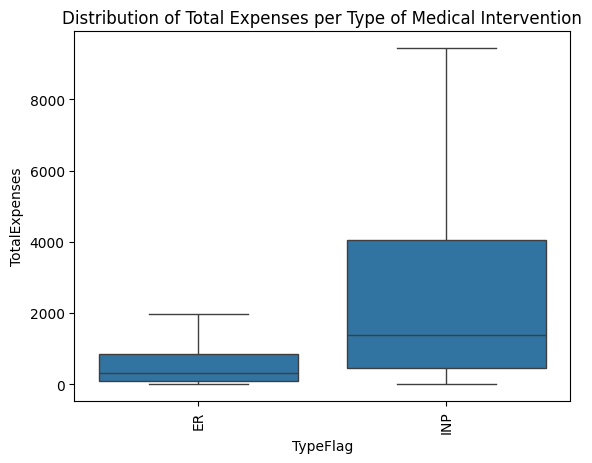

In [16]:
g=sns.boxplot(data=HealthCareDataSet, x="TypeFlag", y="TotalExpenses",showfliers=False)
g.set_title('Distribution of Total Expenses per Type of Medical Intervention');
g.set_xticklabels(g.get_xticklabels(), rotation=90);


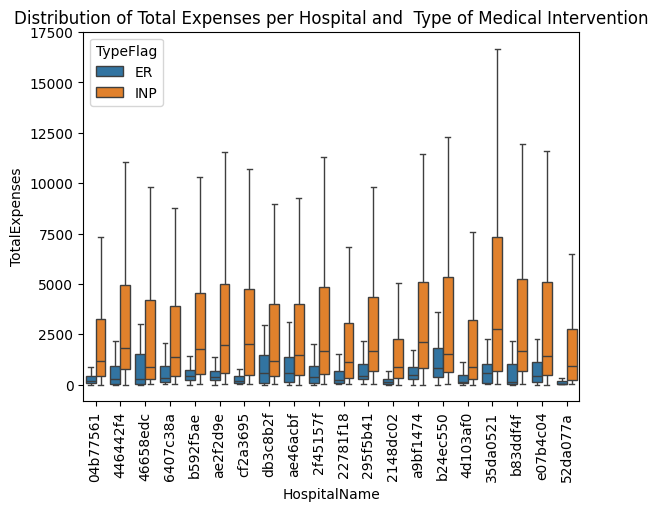

In [17]:
g=sns.boxplot(data=HealthCareDataSet[Top20HospitalFilter], x="HospitalName", y="TotalExpenses", hue='TypeFlag',showfliers=False)
g.set_title('Distribution of Total Expenses per Hospital and  Type of Medical Intervention');
g.set_xticklabels(g.get_xticklabels(), rotation=90);


#### Based on the previous two figures we conclude that InPatient (INP) medical events are, on average, more expensive than Emergency Room (ER) related medical events.

### 5. County cost analysis
#### Let's perform some basic exploration of costs accross different counties

In [18]:
HealthCareDataSet.groupby('County')['TotalExpenses'].sum().sort_values(ascending=False).head(20)

County
02af982d    6.965805e+07
425a37b2    2.389492e+07
fd218584    1.641345e+07
89e38653    8.851130e+06
b021dd12    6.025211e+06
6f943458    5.933939e+06
e6708950    4.236988e+06
7d9b432e    2.309971e+06
ea48569b    1.617326e+06
6f0b5b6c    1.391760e+06
adb3fb00    1.315727e+06
fc471384    1.032336e+06
5597ffc0    6.876542e+05
39825de7    3.075075e+05
b60a20c4    4.498350e+04
217dc01f    3.133535e+04
bd284e56    1.447040e+04
7a56b047    3.420200e+03
33b7d74d    1.733242e+03
Name: TotalExpenses, dtype: float64

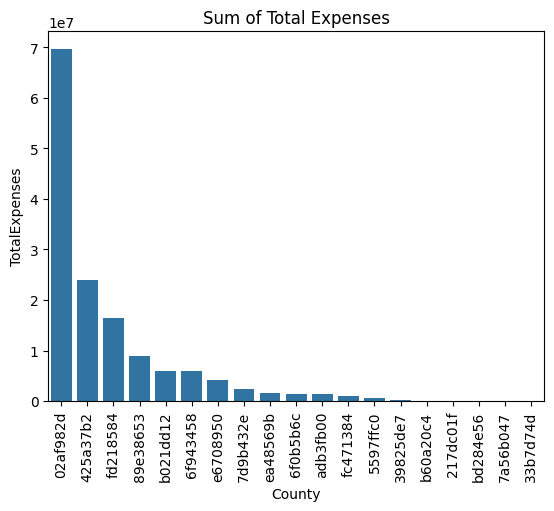

In [19]:
g=sns.barplot(data=HealthCareDataSet.groupby('County')['TotalExpenses'].sum().sort_values(ascending=False))
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title('Sum of Total Expenses');

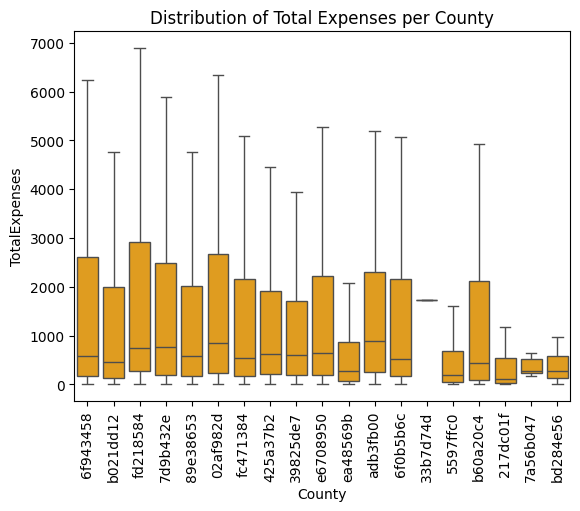

In [21]:
g=sns.boxplot(data=HealthCareDataSet, x="County", y="TotalExpenses",showfliers=False,color='orange')
g.set_title('Distribution of Total Expenses per County');
g.set_xticklabels(g.get_xticklabels(), rotation=90);


#### From the previous two figures we observe that the county named `02af982d` exhibits the largest expenses. Overall all counties exhibit similar average expenses except county `33b7d74d` which presents higher than average expenses (circa 2000 US Dollars)

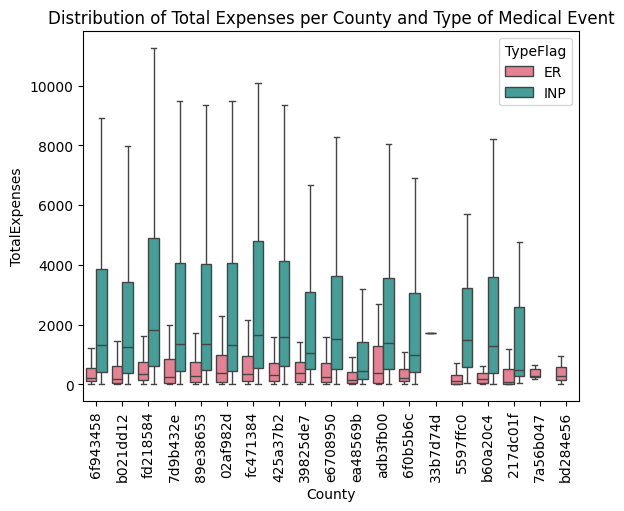

In [27]:
g=sns.boxplot(data=HealthCareDataSet, x="County", y="TotalExpenses",hue='TypeFlag',showfliers=False,palette='husl')
g.set_title('Distribution of Total Expenses per County and Type of Medical Event');
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Based on the previous figure we notice that some counties exhibit lower than average costs in InPatient-related Medical Treatments (e.g. `217dc01f`, `ea48569b`).

### 5. Impact of age on total costs
#### Let's explore the impact of age on total costs. To do this we will try to find relationships between the variable `AgeAtMedicalEvent` and `TotalExpenses`

#### Let's compute first the total expenses per MedicalClaim

In [34]:
HealthCareDataSet.head(100).groupby('MedicalClaim').agg({'TotalExpenses': 'sum', 'AgeAtMedicalEvent': 'mean'})

,TotalExpenses,AgeAtMedicalEvent
MedicalClaim,,
26dec97fae206666,7492.100,82.551677
2f6e3fb72ac69afc,28314.314,72.005476
c1e3436737c77899,8565.130,52.657084
ca0a1759b415e2cc,7802.039,71.991786
d38d75f3f0c8ff1d,3018.106,50.390144
e3678501da0b8833,1534.400,33.856263
e3b55a09106b403f,37925.013,84.922656


In [35]:
HealthCareDataSetGroupedByMedicalClaim=HealthCareDataSet.groupby('MedicalClaim').agg({'TotalExpenses': 'sum', 'AgeAtMedicalEvent': 'mean'})
HealthCareDataSetGroupedByMedicalClaim

,TotalExpenses,AgeAtMedicalEvent
MedicalClaim,,
0012a8eb3c2be5f5,4668.692,64.232717
002fd7d73d8060f1,53501.259,74.863792
003886fc8ec986d4,17115.714,64.380561
004fa1cd47f65193,3672.361,68.944559
005edafb00d0f6eb,2548.700,73.338809
...,...,...
ffbb520f6fd3b2c9,16743.412,73.691992
ffbd17c54f798c21,137173.701,83.219713
ffe2c14dfe865b6d,82255.586,82.663929


In [36]:
HealthCareDataSetGroupedByMedicalClaim.corr()

,TotalExpenses,AgeAtMedicalEvent
TotalExpenses,1.0000,0.1004
AgeAtMedicalEvent,0.1004,1.0000


<Axes: xlabel='AgeAtMedicalEvent', ylabel='TotalExpenses'>

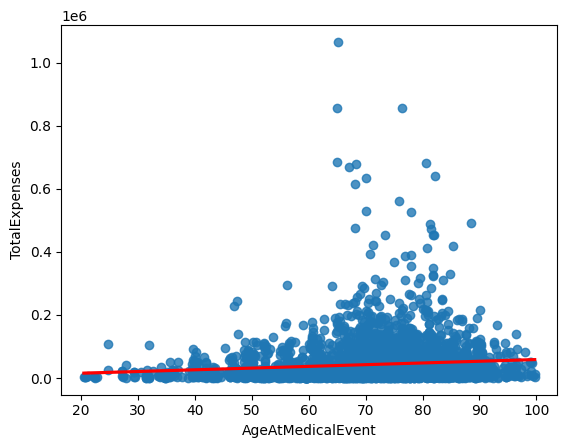

In [39]:
sns.regplot(data=HealthCareDataSetGroupedByMedicalClaim, x="AgeAtMedicalEvent", y="TotalExpenses",line_kws=dict(color="r"))

#### Both the level of correlation (0.1) and the plot suggest a very weak relationship between age and total costs per medical event.

In [41]:
HealthCareDataSetGroupedByMedicalClaimAndTypeFlag=HealthCareDataSet.groupby(['MedicalClaim','TypeFlag']).agg({'TotalExpenses': 'sum', 'AgeAtMedicalEvent': 'mean'}).reset_index()
HealthCareDataSetGroupedByMedicalClaimAndTypeFlag

,MedicalClaim,TypeFlag,TotalExpenses,AgeAtMedicalEvent
0,0012a8eb3c2be5f5,ER,4668.692,64.232717
1,002fd7d73d8060f1,INP,53501.259,74.863792
2,003886fc8ec986d4,ER,17115.714,64.380561
3,004fa1cd47f65193,ER,3672.361,68.944559
4,005edafb00d0f6eb,ER,2548.700,73.338809
...,...,...,...,...
3356,ffbb520f6fd3b2c9,ER,16743.412,73.691992
3357,ffbd17c54f798c21,INP,137173.701,83.219713
3358,ffe2c14dfe865b6d,INP,82255.586,82.663929
3359,ffe9f5181940e236,INP,32393.578,84.569473


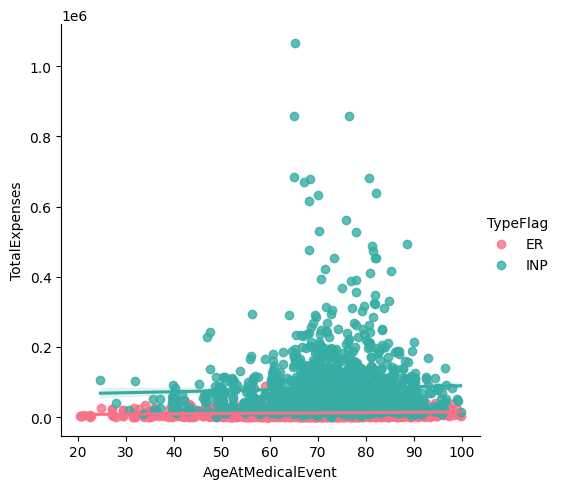

In [48]:
sns.lmplot(data=HealthCareDataSetGroupedByMedicalClaimAndTypeFlag, x="AgeAtMedicalEvent", y="TotalExpenses",hue='TypeFlag',palette='husl')

#### Based on the figure above age does not seem have an impact on the total expenses irrespective of the Type of Medical Event (Inpatient, ER).

### 6. Impact of medical event duration on total costs
#### Let's explore the impact of medical event duration and total costs. To do this we will try to find relationships between the duration of any given medical event (variables: `StartDate` and `EndDate`) and the total cost of the medical event

In [50]:
HealthCareDataSet['MedicalEventDuration']=HealthCareDataSet['EndDate']-HealthCareDataSet['StartDate']

In [56]:
HealthCareDataSet.head(30).groupby('MedicalClaim').agg({'TotalExpenses': 'sum', 'MedicalEventDuration': 'mean'})

,TotalExpenses,MedicalEventDuration
MedicalClaim,,
c1e3436737c77899,8565.130,0 days
d38d75f3f0c8ff1d,756.959,0 days
e3b55a09106b403f,315.455,3 days


In [61]:
HealthCareDataSetGroupedByMedicalClaim=HealthCareDataSet.groupby('MedicalClaim').agg({'TotalExpenses': 'sum', 'MedicalEventDuration': 'mean'}).reset_index()
HealthCareDataSetGroupedByMedicalClaim

,MedicalClaim,TotalExpenses,MedicalEventDuration
0,0012a8eb3c2be5f5,4668.692,0 days
1,002fd7d73d8060f1,53501.259,6 days
2,003886fc8ec986d4,17115.714,0 days
3,004fa1cd47f65193,3672.361,0 days
4,005edafb00d0f6eb,2548.700,0 days
...,...,...,...
3356,ffbb520f6fd3b2c9,16743.412,0 days
3357,ffbd17c54f798c21,137173.701,9 days
3358,ffe2c14dfe865b6d,82255.586,4 days
3359,ffe9f5181940e236,32393.578,2 days


In [76]:
HealthCareDataSetGroupedByMedicalClaim['MedicalEventDurationInDays']=HealthCareDataSetGroupedByMedicalClaim['MedicalEventDuration'].dt.days

In [81]:
HealthCareDataSetGroupedByMedicalClaim[['TotalExpenses','MedicalEventDurationInDays']].corr()

,TotalExpenses,MedicalEventDurationInDays
TotalExpenses,1.000000,0.785511
MedicalEventDurationInDays,0.785511,1.000000


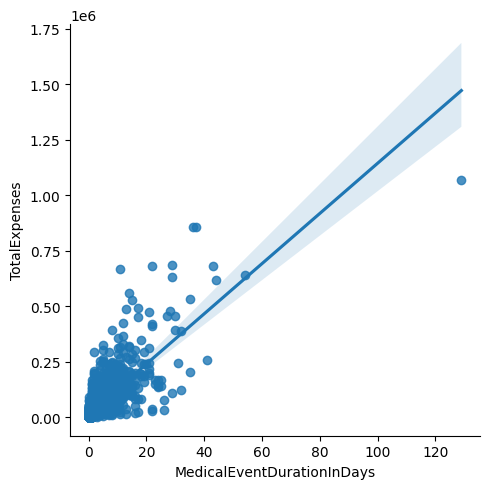

In [79]:
sns.lmplot(data=HealthCareDataSetGroupedByMedicalClaim, x="MedicalEventDurationInDays", y="TotalExpenses")

#### The level of correlation betwen `MedicalEventDurationInDays` and `TotalExpenses` (0.78) and the figure indicate a strong impact on the duration of the medical event and the total costs associated.